# SHAP

In [1]:
from pathlib import Path

import pandas as pd
import shap

from src.config import Config
from src.train import ModelTrainer
from src.evaluation import SHAPExplainer

In [2]:
cfg = Config(Path("../config/config.yaml"))

2025-08-19 13:11:41,101 - INFO - src.utils - Global random seed set to 42


C:\Users\Vito\AppData\Local\Temp\ipykernel_21444\3800476278.py:20: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


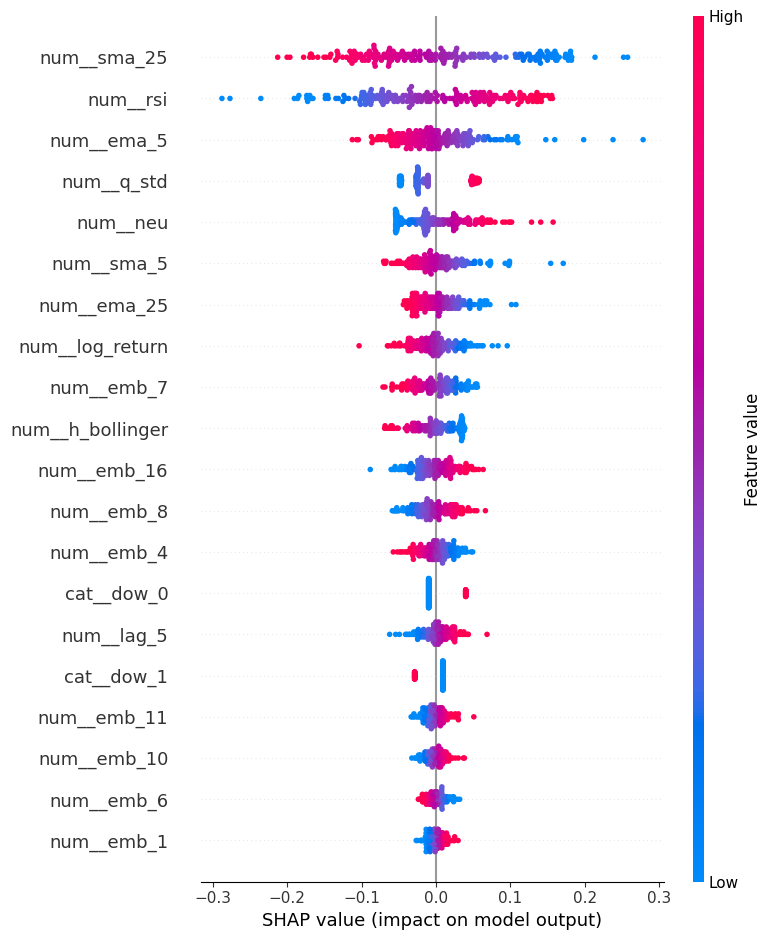

In [9]:
model_path = Path(cfg.model.path_dir) / cfg.model.enet_mo_best_30
model, preprocessor, y_scaler, _ = ModelTrainer.load(str(model_path))

X_test = pd.read_parquet(Path(cfg.data.processed_dir) / "X_test_30.parquet")
X_test_proc = preprocessor.transform(X_test)

feature_names = preprocessor.get_feature_names_out()

explainer = SHAPExplainer(
    model=model,
    preprocessor=preprocessor,
    background_data=X_test.sample(n=100, random_state=cfg.runtime.seed),
)

shap_values = explainer.explain(X_test)

shap.summary_plot(
    shap_values[0],
    X_test_proc,
    feature_names=feature_names,
    show=True
)

In [8]:
import numpy as np


X_proc = preprocessor.transform(X_test)
y_pred_scaled = model.predict(X_proc)
print("Y scaled prediction std dev per target:\n", np.std(y_pred_scaled, axis=0))


Y scaled prediction std dev per target:
 target_0     0.154764
target_1     0.109794
target_2     0.109408
target_3     0.095032
target_4     0.104297
target_5     0.117427
target_6     0.091504
target_7     0.141608
target_8     0.163079
target_9     0.110404
target_10    0.127258
target_11    0.102788
target_12    0.147578
target_13    0.121990
target_14    0.099205
target_15    0.119003
target_16    0.122941
target_17    0.135741
target_18    0.101024
target_19    0.127875
target_20    0.119714
target_21    0.113894
target_22    0.110295
target_23    0.120406
target_24    0.103572
target_25    0.097387
target_26    0.113112
target_27    0.095630
target_28    0.126394
target_29    0.110426
dtype: float64


In [10]:
print("Feature std dev after preprocessing:\n", X_proc.std(axis=0))


Feature std dev after preprocessing:
 [0.9824719  1.07355278 0.93533912 0.95395173 0.56693754 0.66248607
 0.8703808  1.02727074 0.88175627 1.03208572 0.90666922 0.96330029
 0.7365295  0.99776259 1.05295954 0.6585203  0.68512481 0.73859238
 0.91970761 0.90187236 1.13765999 0.8241867  1.08421387 0.86677366
 0.44154264 0.53758    0.82116894 0.89568845 0.88887764 0.81445621
 0.90637367 0.90968918 0.82153045 1.02309454 0.95037045 0.05945895
 0.37048762 0.74565104 0.39287008 0.4045653  0.4045653  0.4045653
 0.39287008 0.46428966 0.38453055 0.3801874  0.47017543]


In [11]:
import numpy as np


shap_array = shap_values[0] if isinstance(shap_values, list) else shap_values
print("SHAP mean abs:\n", np.mean(np.abs(shap_array), axis=0))


SHAP mean abs:
 [0.00134769 0.03304338 0.         0.         0.00422096 0.00766386
 0.         0.         0.01612681 0.00644622 0.00814174 0.02184132
 0.02020107 0.00168936 0.00947027 0.01027118 0.         0.
 0.         0.         0.0215669  0.02194585 0.0798868  0.
 0.0216917  0.         0.01446102 0.02627148 0.04201618 0.
 0.00015238 0.         0.         0.08795013 0.02338698 0.00550886
 0.03592192 0.00326827 0.01564427 0.01314987 0.         0.
 0.         0.         0.         0.         0.00046493]
